In [458]:
# import librarties
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [459]:
# set matploblib syling to seaborn
plt.style.use('seaborn') # deprecated

rcParams['axes.titlepad'] = 15
rcParams['axes.labelpad'] = 15
rcParams['axes.titlesize'] = 12
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 10
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'

In [460]:
# set directories
dir = os.getcwd()
folder = 'data'
path = os.path.join(dir, folder)

# read data
filename = 'data-tagging.csv'
filepath = os.path.join(path, filename)

In [461]:
# read data
df = pd.read_csv(filepath)

# check data
df.head()

,id,kalimat,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi,artikel,observasi
0,1.0,Dok kemarin malam tiba-tiba anak saya usia 6 t...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,baru malam ini panas dingin.,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,obatnya apa ya dok?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,mohon bantuannya ya terima kasih,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,"Alo, Terima kasih atas pertanyaannya.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [462]:
# trim all columns name
df.columns = df.columns.str.strip()

In [463]:
# drop id column
df.drop('id', axis=1, inplace=True)

# change nan to 0
df.fillna(0, inplace=True)

# check data
df.head()

,kalimat,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi,artikel,observasi
0,Dok kemarin malam tiba-tiba anak saya usia 6 t...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,baru malam ini panas dingin.,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,obatnya apa ya dok?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,mohon bantuannya ya terima kasih,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Alo, Terima kasih atas pertanyaannya.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [464]:
# print data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   kalimat      1125 non-null   object 
 1   pasien       1125 non-null   float64
 2   usia pasien  1125 non-null   float64
 3   penyakit     1125 non-null   float64
 4   gejala       1125 non-null   float64
 5   kapan        1125 non-null   float64
 6   periode      1125 non-null   float64
 7   tindakan     1125 non-null   float64
 8   outcome      1125 non-null   float64
 9   pertanyaan   1125 non-null   float64
 10  pembuka      1125 non-null   float64
 11  penyebab     1125 non-null   float64
 12  prakondisi   1125 non-null   float64
 13  objek        1125 non-null   float64
 14  penutup      1125 non-null   float64
 15  referensi    1125 non-null   float64
 16  artikel      1125 non-null   float64
 17  observasi    1125 non-null   float64
dtypes: float64(17), object(1)
memory usage: 158.3+ K

In [465]:
# for all column except kalimat change data type to int
for item in df.columns:
    if item != 'kalimat':
        df[item] = df[item].astype(int)

# check data
df.head()

,kalimat,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi,artikel,observasi
0,Dok kemarin malam tiba-tiba anak saya usia 6 t...,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,baru malam ini panas dingin.,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,obatnya apa ya dok?,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,mohon bantuannya ya terima kasih,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Alo, Terima kasih atas pertanyaannya.",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [466]:
# print sum of each column except kalimat
print(df[df.columns[1:]].sum())

pasien          48
usia pasien     30
penyakit       134
gejala         114
kapan           46
periode         46
tindakan       475
outcome         67
pertanyaan      78
pembuka         59
penyebab       168
prakondisi     143
objek          162
penutup         75
referensi       15
artikel          1
observasi       57
dtype: int64


In [467]:
# drop row where observation is 1
df = df[df['observasi'] == 0]
df = df[df['artikel'] == 0]

# remove observation column
df.drop('observasi', axis=1, inplace=True)
df.drop('artikel', axis=1, inplace=True)

# drop row with total column value is 0
df = df[df[df.columns[1:]].sum(axis=1) != 0]

In [468]:
df.head(10)

,kalimat,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi
0,Dok kemarin malam tiba-tiba anak saya usia 6 t...,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,baru malam ini panas dingin.,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,obatnya apa ya dok?,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,"Alo, Terima kasih atas pertanyaannya.",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,Batuk dan flu dan panas dingin dapat disebabka...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
6,Berdasarkan dari riwayat keluhan yang Anda sam...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
8,"Namun, apabila keluhan tidak membaik dalam 2-3...",0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
9,"keluhan disertai dengan demam tinggi, sesak n...",0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
10,Dokter akan melakukan evaluasi lebih lanjut te...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11,dan memberikan terapi yang sesuai.,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [469]:
# check if theres any empty string
df[df['kalimat'] == '']

,kalimat,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi


In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1124
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   kalimat      1000 non-null   object
 1   pasien       1000 non-null   int32 
 2   usia pasien  1000 non-null   int32 
 3   penyakit     1000 non-null   int32 
 4   gejala       1000 non-null   int32 
 5   kapan        1000 non-null   int32 
 6   periode      1000 non-null   int32 
 7   tindakan     1000 non-null   int32 
 8   outcome      1000 non-null   int32 
 9   pertanyaan   1000 non-null   int32 
 10  pembuka      1000 non-null   int32 
 11  penyebab     1000 non-null   int32 
 12  prakondisi   1000 non-null   int32 
 13  objek        1000 non-null   int32 
 14  penutup      1000 non-null   int32 
 15  referensi    1000 non-null   int32 
dtypes: int32(15), object(1)
memory usage: 74.2+ KB


In [471]:
df.describe()

,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.048000,0.02900,0.129000,0.109000,0.045000,0.04600,0.467000,0.062000,0.078000,0.059000,0.156000,0.143000,0.156000,0.075000,0.014000
std,0.213873,0.16789,0.335368,0.311795,0.207408,0.20959,0.499159,0.241276,0.268306,0.235743,0.363037,0.350248,0.363037,0.263523,0.117549
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [472]:
# print total sums of all rows
print(df[df.columns[1:]].sum(axis=1).sum())

1616


In [473]:
# import libary for machine learning
from sklearn.model_selection import train_test_split

# classifier 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# pipeline
from sklearn.pipeline import Pipeline

# model
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [474]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hiday\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [475]:
# set columns
columns = df.columns[1:]
print(columns)

Index(['pasien', 'usia pasien', 'penyakit', 'gejala', 'kapan', 'periode',
       'tindakan', 'outcome', 'pertanyaan', 'pembuka', 'penyebab',
       'prakondisi', 'objek', 'penutup', 'referensi'],
      dtype='object')


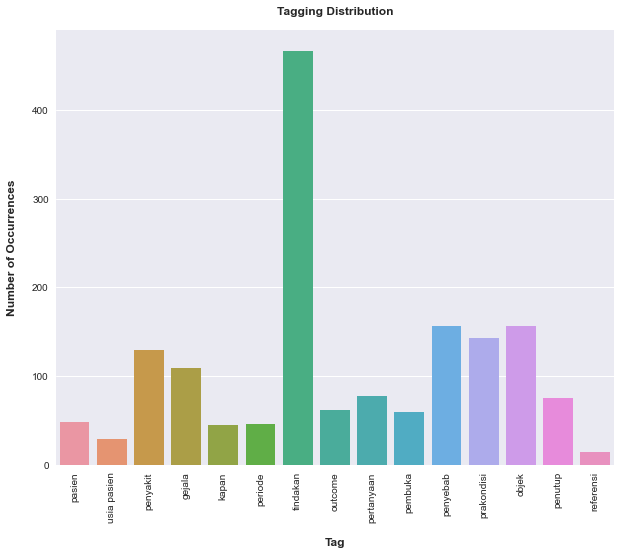

In [476]:
# countplot for each columns
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x=columns, y=df[columns].sum().values)
plt.title("Tagging Distribution")
plt.ylabel('Number of Occurrences')
plt.xlabel('Tag')
plt.xticks(rotation=90)

plt.show()

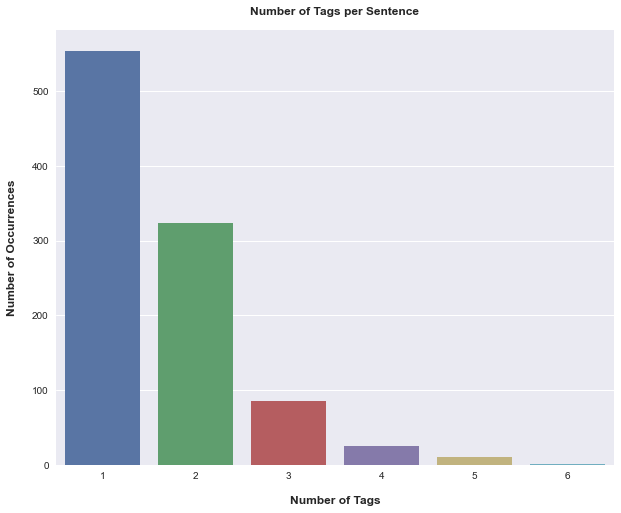

In [477]:
# row with sum > 1
temp = df.iloc[:,1:].sum(axis=1).value_counts()

# plot
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x=temp.index, y=temp.values)
plt.title("Number of Tags per Sentence")
plt.ylabel('Number of Occurrences')
plt.xlabel('Number of Tags')

plt.show()

In [478]:
print(temp)

1    554
2    324
3     86
4     25
5     10
6      1
dtype: int64


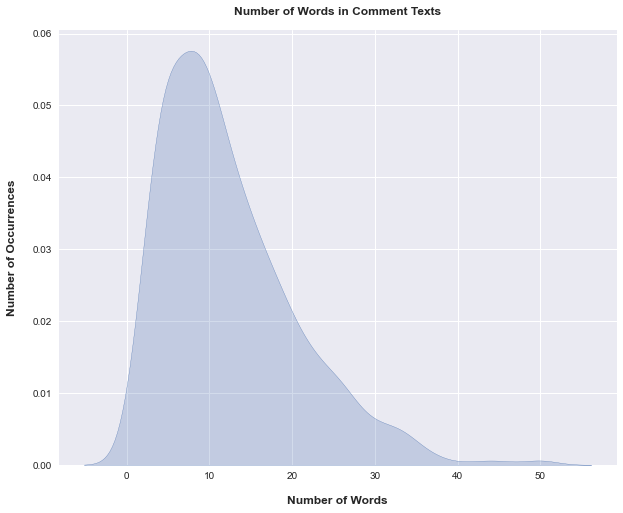

In [479]:
# The distribution of the number of words in comment texts.
fig, ax = plt.subplots(figsize=(10, 8))

sns.kdeplot(df['kalimat'].str.split().map(lambda x: len(x)), fill=True)
plt.title("Number of Words in Comment Texts")
plt.ylabel('Number of Occurrences')
plt.xlabel('Number of Words')

plt.show()

In [480]:
# average number of words in kalimat
print('Average number of words in kalimat: {}'.format(df['kalimat'].str.split().map(lambda x: len(x)).mean()))

Average number of words in kalimat: 12.375


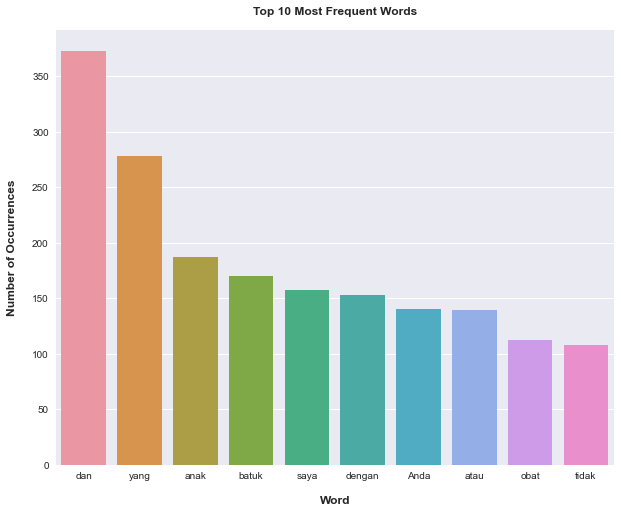

In [481]:
# graph top 10 most frequent words
fig, ax = plt.subplots(figsize=(10, 8))

freq = pd.Series(' '.join(df['kalimat']).split()).value_counts()[:10]
sns.barplot(x=freq.index, y=freq.values)
plt.title("Top 10 Most Frequent Words")
plt.ylabel('Number of Occurrences')
plt.xlabel('Word')

plt.show()

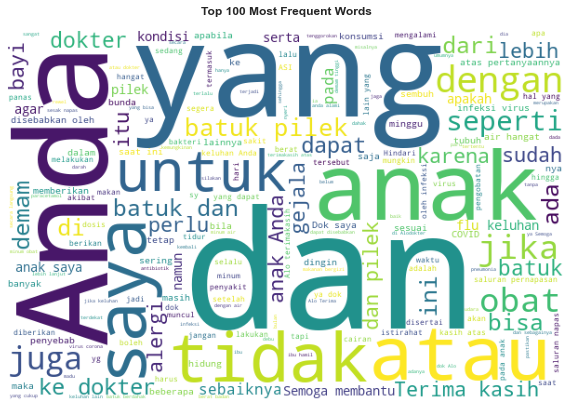

In [482]:
# wordcloud for top 100 most frequent words
from wordcloud import WordCloud

fig, ax = plt.subplots(figsize=(10, 8))

wordcloud = WordCloud(background_color='white', width=600, height=400).generate(" ".join(df['kalimat']))
plt.imshow(wordcloud)
plt.title("Top 100 Most Frequent Words")
plt.axis('off')

plt.show()

### NLTK Processing

In [483]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))
stop_words = [word for word in stop_words if '-' not in word]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hiday\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [484]:
import re

# remove punctuation
df['kalimat'] = df['kalimat'].apply(lambda x: re.sub(r'[^\w\s]','',x))

# lowercasing 
df['kalimat'] = df['kalimat'].apply(lambda x: x.lower())

# nomralize whitespace
df['kalimat'] = df['kalimat'].apply(lambda x: re.sub(r'\s+', ' ', x))

# remove stopword
df['kalimat'] = df['kalimat'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# clean text indonesia
def clean_text(string: str) -> str:

    string = re.sub(r'\byg\b', 'yang', string)
    
    # gk -> tidak
    string = re.sub(r'\bgk\b', 'tidak', string)

    # gak -> tidak
    string = re.sub(r'\bgak\b', 'tidak', string)

    # ga -> tidak
    string = re.sub(r'\bga\b', 'tidak', string)

    # klo -> kalau
    string = re.sub(r'\bklo\b', 'kalau', string)

    # kl -> kalau
    string = re.sub(r'\bkl\b', 'kalau', string)

    # kalo -> kalau
    string = re.sub(r'\bkalo\b', 'kalau', string)

    # tsb -> tersebut
    string = re.sub(r'\btsb\b', 'tersebut', string)

    return string

# clean text
df['kalimat'] = df['kalimat'].apply(clean_text)

# check data
df.head(20)

,kalimat,pasien,usia pasien,penyakit,gejala,kapan,periode,tindakan,outcome,pertanyaan,pembuka,penyebab,prakondisi,objek,penutup,referensi
0,dok kemarin malam tibatiba anak usia 6 panas d...,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,malam panas dingin,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,obatnya ya dok,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,alo terima kasih pertanyaannya,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,batuk flu panas dingin disebabkan penyebab,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
6,berdasarkan riwayat keluhan penyebab batuk pil...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
8,keluhan membaik 23,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
9,keluhan disertai demam sesak napas batuk berda...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
10,dokter evaluasi terkait kondisi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11,terapi sesuai,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


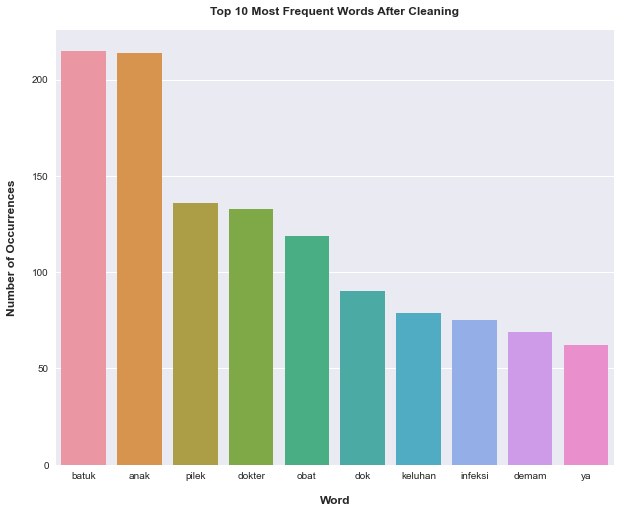

In [485]:
# graph top 10 most frequent words after cleaning
fig, ax = plt.subplots(figsize=(10, 8))

freq = pd.Series(' '.join(df['kalimat']).split()).value_counts()[:10]
sns.barplot(x=freq.index, y=freq.values)
plt.title("Top 10 Most Frequent Words After Cleaning")
plt.ylabel('Number of Occurrences')
plt.xlabel('Word')

plt.show()

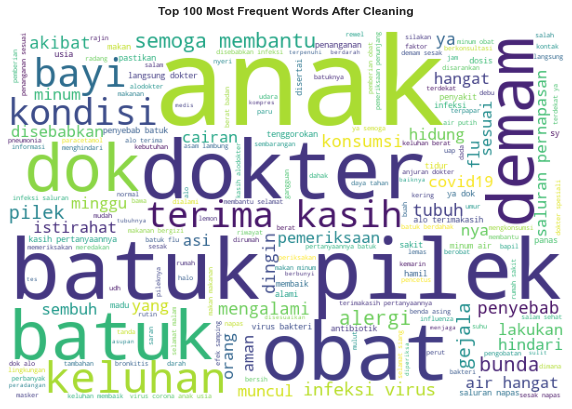

In [486]:
# top 100 most frequent words after cleaning
fig, ax = plt.subplots(figsize=(10, 8))

wordcloud = WordCloud(background_color='white', width=600, height=400).generate(" ".join(df['kalimat']))
plt.imshow(wordcloud)
plt.title("Top 100 Most Frequent Words After Cleaning")
plt.axis('off')

plt.show()

In [487]:
# split data into train and test
train, test = train_test_split(df, random_state=42, test_size=0.30, shuffle=True)

X_train = train['kalimat']
X_test = test['kalimat']
print(X_train.shape, X_test.shape)

(700,) (300,)


In [488]:
# multilabel-indicator score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [489]:
# folder to save score txt file
score_folder = 'score'
score_path = os.path.join(os.getcwd(), score_folder)

# check if score folder exists
if not os.path.exists(score_path):
    os.mkdir(score_path)

def print_score(pipeline: Pipeline,  model_name: str) -> None:
    '''
    Function to print the scores of the model
    '''
    # check if model folder exists
    model_folder = os.path.join(score_path, model_name)
    model_path = os.path.join(score_path, model_name)
    
    if not os.path.exists(model_path):
        os.mkdir(model_path)

    # loop through each column
    for item in columns:
        
        print('Processing {}'.format(item))
        pipeline.fit(X_train, train[item])
        prediction = pipeline.predict(X_test)

        # save score to txt file
        with open(os.path.join(model_path, item + '.txt'), 'w') as f:
            f.write('%-30s: %f\n' % ('F1 score', f1_score(test[item], prediction, average='weighted')))
            f.write('%-30s: %f\n' % ('Precision score', precision_score(test[item], prediction, average='weighted', zero_division=0)))
            f.write('%-30s: %f\n' % ('Recall score', recall_score(test[item], prediction, average='weighted')))
            f.write('%-30s: %f\n' % ('Test accuracy', accuracy_score(test[item], prediction)))

            # new line
            f.write("\n")

            # confusion_matrix
            f.write("Confusion Matrix\n")
            f.write(str(confusion_matrix(test[item], prediction)))

            # new line
            f.write("\n")

            # classification_report
            f.write("Classification Report\n")

            # classification_report
            f.write(str(classification_report(test[item], prediction, zero_division=0)))

            # new line
            f.write("\n")

In [490]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
print_score(NB_pipeline, 'Naive Bayes')

Processing pasien
Processing usia pasien
Processing penyakit
Processing gejala
Processing kapan
Processing periode
Processing tindakan
Processing outcome
Processing pertanyaan
Processing pembuka
Processing penyebab
Processing prakondisi
Processing objek
Processing penutup
Processing referensi


In [491]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
print_score(SVC_pipeline, 'Linear SVC')

Processing pasien
Processing usia pasien
Processing penyakit
Processing gejala
Processing kapan
Processing periode
Processing tindakan
Processing outcome
Processing pertanyaan
Processing pembuka
Processing penyebab
Processing prakondisi
Processing objek
Processing penutup
Processing referensi


In [492]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
print_score(LogReg_pipeline, 'Logistic Regression')

Processing pasien
Processing usia pasien
Processing penyakit
Processing gejala
Processing kapan
Processing periode
Processing tindakan
Processing outcome
Processing pertanyaan
Processing pembuka
Processing penyebab
Processing prakondisi
Processing objek
Processing penutup
Processing referensi


In [493]:
randomForest_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42), n_jobs=1)),
])
print_score(randomForest_pipeline, 'Random Forest')

Processing pasien
Processing usia pasien
Processing penyakit
Processing gejala
Processing kapan
Processing periode
Processing tindakan
Processing outcome
Processing pertanyaan
Processing pembuka
Processing penyebab
Processing prakondisi
Processing objek
Processing penutup
Processing referensi
